In [60]:
import pandas as pd
import numpy as np

In [206]:
df=pd.read_csv('spam.csv')

In [207]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## most of the values of col 2,3,4 are null so removing those

In [64]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [65]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [66]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [67]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [68]:
df.duplicated().sum()

403

In [69]:
df.drop_duplicates()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will �_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [70]:
df['target'].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x21200b8d7d0>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'ham'),
  Text(1.0038714771419537, -0.44971330576360763, 'spam')],
 [Text(-0.5475662717424827, 0.24529814114672266, '86.59'),
  Text(0.5475662602592474, -0.2452981667801496, '13.41')])

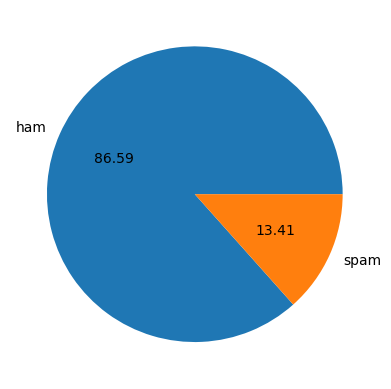

In [71]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [72]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tusha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [73]:
df['num_characters']=df['text'].apply(len)
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [74]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [76]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.058686,18.700826,1.997846
std,59.624385,13.743217,1.522285
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,2.000000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [77]:
# for ham messages analysis
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.021762,17.276269,1.837720
std,58.015364,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [78]:
# for spam messages analysis
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.429719,27.902276,3.032129
std,29.049857,6.871851,1.546088
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [79]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

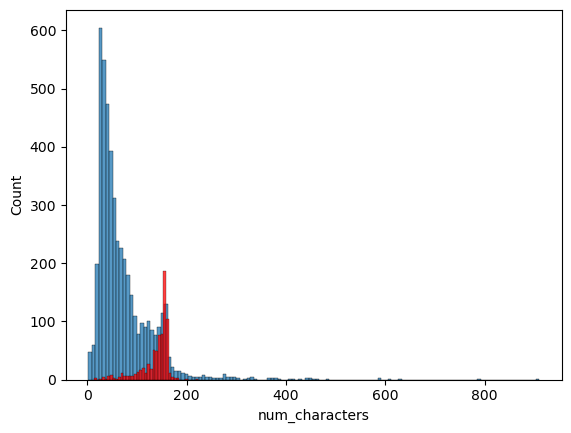

In [82]:
sns.histplot(df[df['target']==0]['num_characters']) # ham
sns.histplot(df[df['target']==1]['num_characters'],color='red') # spam

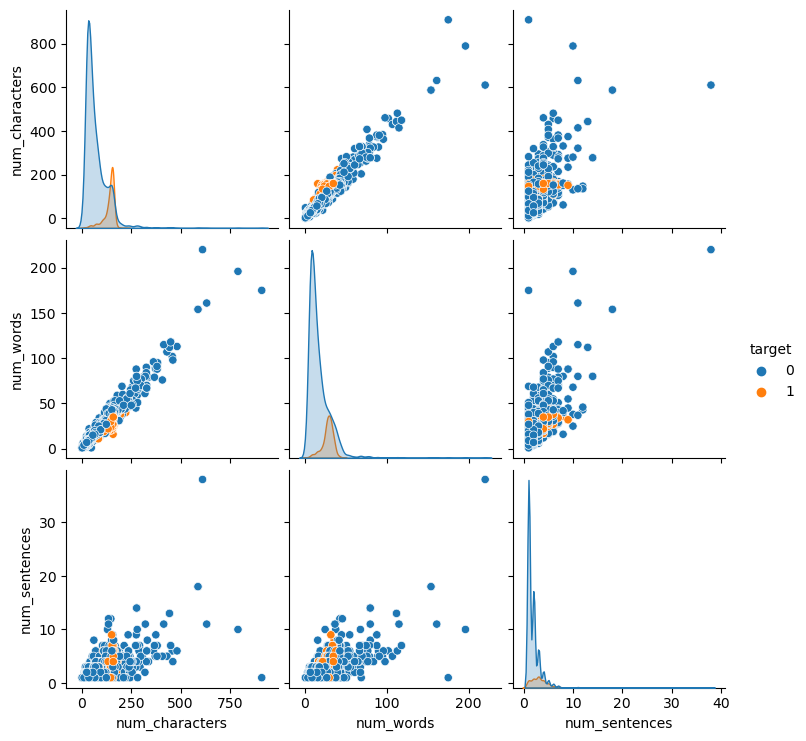

In [83]:
sns.pairplot(df,hue='target')

<Axes: >

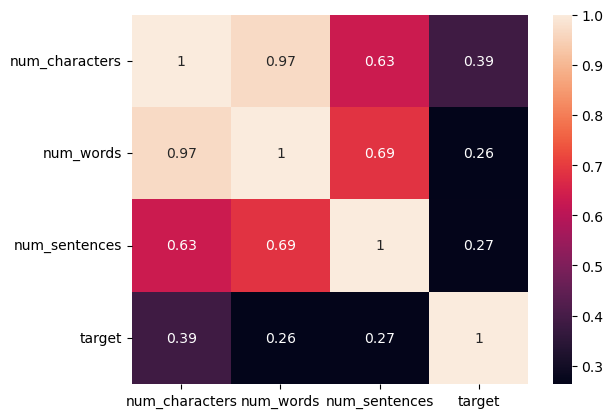

In [93]:
sns.heatmap(df[['num_characters','num_words','num_sentences','target']].corr(),annot=True)

## as correlation of target with num_characters is comparatively high so we will choose that column only

## Data Preprocessing
1. lower case
2. tokenization
3. removing special characters
4. removing stop words and punctuation
5. stemming

In [101]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tusha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [105]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

def transform_text(text):
    text = text.lower() # lower case

    text = nltk.word_tokenize(text) # tokenize text

    y=[]

    for i in text:
        if i.isalnum():
            y.append(i) # removing special characters

    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i) # removing stop words and punctuation

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))    # stemming

    return " ".join(y)

In [106]:
transform_text('I loved the YT lecutes on machine learning!')

'love yt lecut machin learn'

In [108]:
df['transformed_text']=df['text'].apply(transform_text)

In [109]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [111]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/151.4 kB ? eta -:--:--
   ---------- ---------------------------- 41.0/151.4 kB 495.5 kB/s eta 0:00:01
   --------------------- ----------------- 81.9/151.4 kB 762.6 kB/s eta 0:00:01
   ---------------------------- --------- 112.6/151.4 kB 595.3 kB/s eta 0:00:01
   -------------------------------------- 151.4/151.4 kB 820.9 kB/s eta 0:00:00


## make wordcloud so that we can most frequently used words for spam and ham texts

In [122]:
from wordcloud import WordCloud
wc = WordCloud(width=600, height=600, min_font_size=10, background_color='white')

In [123]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

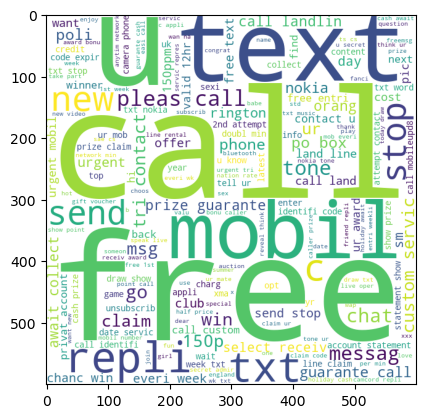

In [124]:
plt.imshow(spam_wc)

In [125]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

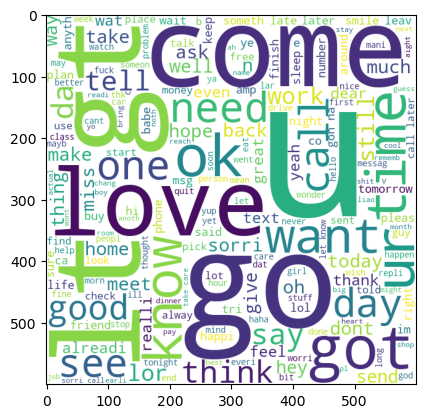

In [126]:
plt.imshow(ham_wc)

In [127]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [130]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [132]:
len(spam_corpus)

11495

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'ur'),
  Text(5, 0, 'u'),
  Text(6, 0, 'text'),
  Text(7, 0, 'mobil'),
  Text(8, 0, '4'),
  Text(9, 0, 'claim'),
  Text(10, 0, 'stop'),
  Text(11, 0, 'repli'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'tone'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'send'),
  Text(17, 0, 'new'),
  Text(18, 0, 'nokia'),
  Text(19, 0, 'award'),
  Text(20, 0, 'week'),
  Text(21, 0, 'cash'),
  Text(22, 0, 'urgent'),
  Text(23, 0, 'win'),
  Text(24, 0, 'contact'),
  Text(25, 0, 'pleas'),
  Text(26, 0, 'phone'),
  Text(27, 0, 'c'),
  Text(28, 0, 'custom'),
  Text(29, 0, 'collect')])

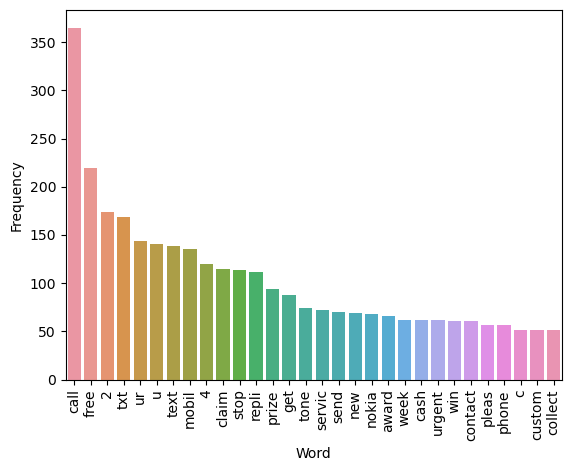

In [147]:
from collections import Counter
import seaborn as sns
word_counts = Counter(spam_corpus)

# Create a DataFrame from the most common 30 words
common_words_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Frequency'])

# Create the bar plot
sns.barplot(x='Word', y='Frequency', data=common_words_df)
plt.xticks(rotation=90)

In [148]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'call'),
  Text(8, 0, 'know'),
  Text(9, 0, 'ok'),
  Text(10, 0, 'like'),
  Text(11, 0, 'got'),
  Text(12, 0, 'love'),
  Text(13, 0, 'ur'),
  Text(14, 0, 'good'),
  Text(15, 0, 'time'),
  Text(16, 0, 'want'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, '4'),
  Text(21, 0, 'lor'),
  Text(22, 0, 'home'),
  Text(23, 0, 'sorri'),
  Text(24, 0, 'see'),
  Text(25, 0, 'think'),
  Text(26, 0, 'da'),
  Text(27, 0, 'take'),
  Text(28, 0, 'still'),
  Text(29, 0, 'n')])

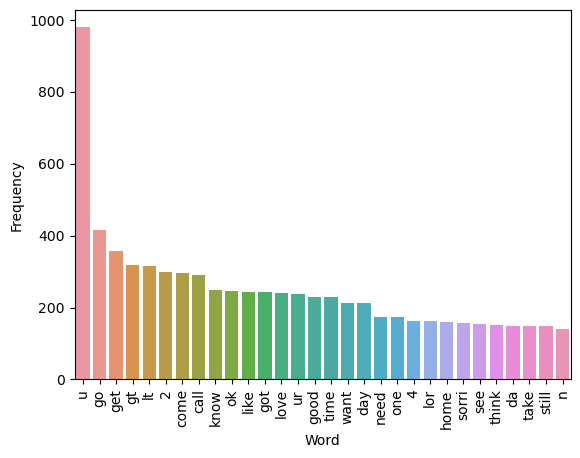

In [149]:
word_counts = Counter(ham_corpus)

# Create a DataFrame from the most common 30 words
common_words_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Frequency'])

# Create the bar plot
sns.barplot(x='Word', y='Frequency', data=common_words_df)
plt.xticks(rotation=90)

# MODEL BUILDING

In [204]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf = TfidfVectorizer()

In [151]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [202]:
y=df['target'].values

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [158]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [156]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [164]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8717488789237668
[[841 116]
 [ 27 131]]
0.5303643724696356


In [165]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9721973094170404
[[943  14]
 [ 17 141]]
0.9096774193548387


In [166]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9695067264573991
[[956   1]
 [ 33 125]]
0.9920634920634921


## for bag of words ,i.e., using countVectorization we have highest precision score for bernoulli naive bayes

also here precision matters more than accuracy 

In [201]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [169]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [172]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8672645739910314
[[842 115]
 [ 33 125]]
0.5208333333333334


In [203]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.957847533632287
[[957   0]
 [ 47 111]]
1.0


In [174]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9695067264573991
[[956   1]
 [ 33 125]]
0.9920634920634921


## for tfid we have highest precision score for multinomial naive bayes

# performing model building using other models

In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [176]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [177]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [178]:

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [179]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9659192825112107
Precision -  0.9761904761904762
For  KN
Accuracy -  0.8986547085201794
Precision -  1.0
For  NB
Accuracy -  0.957847533632287
Precision -  1.0
For  DT
Accuracy -  0.9255605381165919
Precision -  0.8787878787878788
For  LR
Accuracy -  0.9443946188340807
Precision -  0.9444444444444444
For  RF
Accuracy -  0.9650224215246637
Precision -  0.9917355371900827
For  AdaBoost
Accuracy -  0.9533632286995516
Precision -  0.9344262295081968
For  BgC
Accuracy -  0.9587443946188341
Precision -  0.9242424242424242
For  ETC
Accuracy -  0.9668161434977578
Precision -  1.0
For  GBDT
Accuracy -  0.9417040358744395
Precision -  0.9603960396039604
For  xgb
Accuracy -  0.9623318385650225
Precision -  0.9603174603174603


In [180]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.898655,1.000000
2,NB,0.957848,1.000000
8,ETC,0.966816,1.000000
5,RF,0.965022,0.991736
0,SVC,0.965919,0.976190
9,GBDT,0.941704,0.960396
10,xgb,0.962332,0.960317
4,LR,0.944395,0.944444
6,AdaBoost,0.953363,0.934426
7,BgC,0.958744,0.924242


In [181]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.898655
1,NB,Accuracy,0.957848
2,ETC,Accuracy,0.966816
3,RF,Accuracy,0.965022
4,SVC,Accuracy,0.965919
5,GBDT,Accuracy,0.941704
6,xgb,Accuracy,0.962332
7,LR,Accuracy,0.944395
8,AdaBoost,Accuracy,0.953363
9,BgC,Accuracy,0.958744


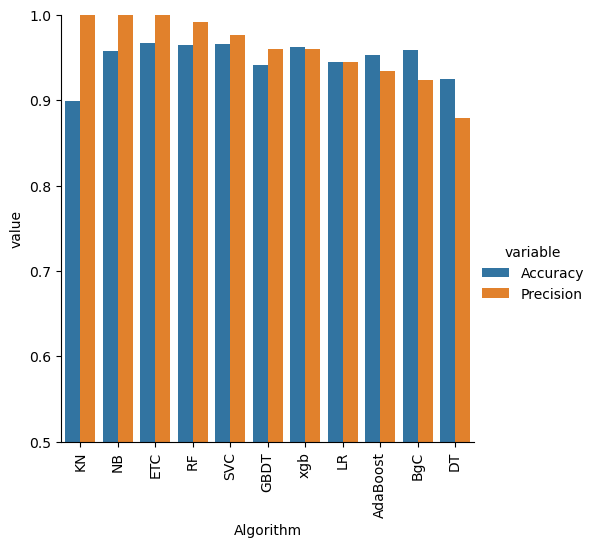

In [182]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [183]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [184]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [185]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [186]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [187]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [188]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.898655,1.000000,0.898655,1.000000,0.898655,1.000000,0.898655,1.000000
1,NB,0.957848,1.000000,0.957848,1.000000,0.957848,1.000000,0.957848,1.000000
2,ETC,0.966816,1.000000,0.966816,1.000000,0.966816,1.000000,0.966816,1.000000
3,RF,0.965022,0.991736,0.965022,0.991736,0.965022,0.991736,0.965022,0.991736
4,SVC,0.965919,0.976190,0.965919,0.976190,0.965919,0.976190,0.965919,0.976190
5,GBDT,0.941704,0.960396,0.941704,0.960396,0.941704,0.960396,0.941704,0.960396
6,xgb,0.962332,0.960317,0.962332,0.960317,0.962332,0.960317,0.962332,0.960317
7,LR,0.944395,0.944444,0.944395,0.944444,0.944395,0.944444,0.944395,0.944444
8,AdaBoost,0.953363,0.934426,0.953363,0.934426,0.953363,0.934426,0.953363,0.934426
9,BgC,0.958744,0.924242,0.958744,0.924242,0.958744,0.924242,0.958744,0.924242


In [189]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [192]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [193]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [194]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9704035874439462
Precision 1.0


In [195]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [196]:
from sklearn.ensemble import StackingClassifier

In [197]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [198]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9766816143497757
Precision 0.9583333333333334


In [205]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))